## 수치 미분

- 경사법에서는 기울기(경사) 값을 시준으로 나아갈 방향을 정함

### 미분

- 미분 : 특정 순간의 변화량

- 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호
- 결국, x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키냐를 의미
- 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미를 lim h -> 0으로 표현

In [1]:
# 미분 계산 파이썬 구현
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50 
    return (f(x + h) - f(x)) / (h)

- 함수의 이름은 수치 미분(numerical differentiation)에서 따옴

- 이 함수는 '함수 f'와 '함수 f에 넘길 인수 x'라는 두 인수를 받음
- 실제로는 개선해야 할 점이 2개 있음

- 앞의 구현에서는 h에 가급적 작은 값을 대입하고 싶었기네 10e - 50이라는 작은 값을 이용
- 이 값은 0.00...1 형태에서 소수점 아래 0이 49개라는 의미

- 그러나 이 방식은 반올림 오차(rounding error) 문제를 일으킴
- 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 함

In [3]:
import numpy as np
# 반올림 오차 예
np.float32(1e-50)

0.0

- 첫 번째 개선 포인트

- 이와 같이 1e-50을 float32형(32비트 부동소수점)으로 나타내면 0.0이 되어, 올바르게 표현 불가
- 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 됨!

- 두 번째 개선

- 함수 f의 차분 관련
- 앞의 구현에서는 x + h와 x 사이의 함수 f의 차분을 계산하고 있지만, 이 계산에는 오차가 있음
- 진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만, 이번 구현에서 미분은 (x + h)와 x 사이의 기울기에 해당
- 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계


- 오차를 줄이기 위해 (x + h)와 (x - h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 함

- 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 '중심 차분' 혹은 '중앙 차분'이라 함
- (x + h)와 x의 차분은 '전방 차분'이라 함

In [4]:
# 개선점 적용 수치 미분 구현
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

- 아주 작은 차분으로 미분하는 것을 '수치 미분'이라 함

- 한편, 수식을 전개해 미분하는 것을 해석적(analytic)이라는 말을 이용하여 '해석적 헤' 혹은 '해석적으로 미분하다' 등으로 표현

### 수치 미분의 예

- 2차 함수를 미분

In [5]:
# 2차 함수 구현
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

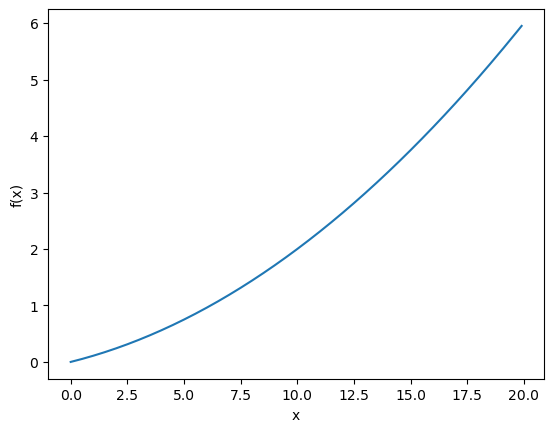

In [6]:
# 함수 그리기
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [7]:
# x = 5에서의 수치 미분
numerical_diff(function_1, 5)

0.1999999999990898

In [8]:
# x = 10에서의 수치 미분
numerical_diff(function_1, 10)

0.2999999999986347

- 이렇게 계산한 미분 값이 x에 대한 f(x)의 변화량
- 함수의 기울기에 해당

- 앞의 수치 미분과 결과를 비교하면 그 오차가 매우 작음

### 편미분

- 인수들의 제곱 합을 계산하는 단순한 식

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

- 인수 x는 넘파이 배열이라고 가정

- 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구할 뿐인 간단한 구현

- 주의할 점

- 변수가 2개!
- '어떤 변수에 대한 미분이냐'를 구별해야 함
- 변수가 여럿인 함수에 대한 미분을 '편미분'이라 함

In [10]:
# x0 = 3, x1 = 4일 때 x0에 대한 편미분
def function_tmp1(x0):
    return x0 * x0 + 4.0**2.0

In [11]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [12]:
# x0 = 3, x1 = 4일 때 x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 이 문제들은 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현

- 해석적 미분의 결과와 거의 같음

- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함

- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정함
- 앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의함
- 그리고 그 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것

## 기울기

- x0과 x1의 편미분을 동시에 계산하고 싶다면?

- 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 함

In [13]:
def numercial_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x + h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x - h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad

- 동작 방식은 변수가 하나일 때의 수치 미분과 거의 같음

- np.zeros_like(x)는 x와 형상이 같고 그 원소가 모두 0인 배열을 만든다

- nimerical_gradient(f, x) 함수의 인수인 f는 함수이고 x는 넘파이 베열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구함

In [14]:
# (3, 4), (0, 2), (3, 0)에서의 기울기
print(numercial_gradient(function_2, np.array([3.0, 4.0])))
print(numercial_gradient(function_2, np.array([0.0, 2.0])))
print(numercial_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


- 이처럼 (x0, x1)의 각 점에서의 기울기를 계산할 수 있음

- 기울기 그림은 방향을 가진 벡터(화살표)로 그려짐

- 기울기는 각 지점에서 낮아지는 방향을 가리킴

- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

### 경사법(경사 하강법)

- 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아냄
- 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 함

- 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값
- 그러나 일반적인 문제의 손실 함수는 매우 복잡
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없음
- 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 작은 값)을 찾으려는 겻이 경사법

- 주의할 점

- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표는 기울기
- 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없음
- 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분

- 함수가 극솟값, 최솟값, 또 안장점(saddle point)이 되는 장소에서는 기울이가 0

- 극솟값은 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점
- 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점
- 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할 수 없음(극솟값이나 안장점일 가능성이 있음)
- 복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 고원(plateau)라 하는 학습이 진행되지 않는 정체기에 빠질 수 있음

- 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있음

- 그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야 함

- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동

- 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아감을 반복
- 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법(gradient method)
- 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법
- 신경망 학습에서는 경사법을 많이 사용

- 경사법은 최솟값을 찾느냐, 최댓값을 찾느냐에 따라 이름이 다름

- 전자를 경사 하강법(gradient descent method), 후자를 경사 상승법(gradient ascant method)라고 함
- 다만 손실 함수의 부호를 반전시키면 최솟값을 찾는 문제와 최댓값을 찾는 문제는 같은 것이니 하강이냐 상승이냐는 본질적으로는 중요하지 않음
- 일반적으로 신경망(딥러닝) 분야에서의 경사법은 '경사 하강법'으로 등장할 때가 많음

- 학습률(learning rate)

- 한 번의 학습으로 얼마만큼 학습해야 할지
- 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률

- 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것

- 변수의 수가 늘어도 같은 식(각 변수의 편미분 값)으로 갱신하게 됨

- 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 함

- 일반적으로 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없음
- 신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행

In [15]:
# 경사하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numercial_gradient(f, x)
        x -= lr * grad
        
    return x

- 인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수

- 함수의 기울기는 numerical_gradient(f, x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복

- 이 함수를 사용하면 함수의 극솟값을 수할 수 있고 잘하면 최솟값을 구할 수 있음

In [16]:
# 경사법으로 f(x0, x1)의 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(result) # [-6.11110793e-10 8.14814391e-10]

[-6.11110793e-10  8.14814391e-10]


- 여기에서는 초깃값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색 시작

- 최종 결과는 [-6.11110793e-10 8.14814391e-10]으로, 거의 (0, 0)에 가까운 값
- 실제로 진정한 최솟값은 (0, 0)이므로 경사법으로 거의 정확한 결과를 얻은 것

In [19]:
# 학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print(result) # [-2.58983747e+13 -1.29583874e+12]

[-2.58983747e+13 -1.29524862e+12]


In [20]:
# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print(result) # [-2.99999994 3.99999992]

[-2.99999994  3.99999992]


- 이 실험 결과와 같이 학습률이 너무 크면 큰 값으로 발산해버림

- 반대로 너무 작으면 거의 갱신되지 않은 채 끝나버림

- 학습률 같은 매개변수를 하이퍼파라미터(hyper parameter, 초매개변수)라고 함

- 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수
- 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수
- 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수
- 일반적으로는 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 함

## 학습 알고리즘 구현하기

- 신경망 학습 절차

- 전제

- 신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 함

- 신경망 학습은 4단계로 수행함

1. 1단계 - 미니배치

- 훈련 데이터 중 일부를 무작위로 가져옴

- 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표

2. 2단계 - 기울기 산출

- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함

- 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시함

3. 3단계 - 매개변수 갱신

- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4. 4단계 - 반복

- 1 ~ 3단계를 반복

- 이것이 신경망 학습이 이뤄지는 순서

- 이는 경사 하강법으로 매개변수를 갱신하는 방법
- 이때 데이터를 미니배치로 무작위로 선정하기 떄문에 확률적 경사 하강법(stochastic gradient descent, SGD)이라고 부름
- '확률벅으로 무작위로 골라낸 데이터'에 대해 수행하는 경사 하강법이라는 의미
- 대부분의 딥러닝 프레임워크는 확률적 경사 하강법의 영어 머리글자를 딴 SGD라는 함수로 이 기능을 구현

### 2층 신경망 클래스 구현하기

In [28]:
import sys, os
import numpy as np
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x - np.max(x, axis=1, keepdims=True)
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp = x.flat[idx]

        x.flat[idx] = tmp + h
        fxh1 = f(x)

        x.flat[idx] = tmp - h
        fxh2 = f(x)

        grad.flat[idx] = (fxh1 - fxh2) / (2*h)
        x.flat[idx] = tmp

    return grad

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = 0.01 * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)  

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy 

    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

- TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 가짐

- params 변수에는 가중치 매개변수가 저장됨

In [29]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


- 이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장됨

- 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됨

In [30]:
# 예측 처리
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

- grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장

- numerical_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장

In [31]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 꼐산

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(10,)

- TwoLayerNet의 메서드

- __init__(self, input_size, hidden_size, output_size) 메서드는 클래스를 초기화함(초기화 메서드는 TwoLayerNet을 생성할 때 불리는 메서드)

- 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
- 출력은 10개
- 따라서 input_size = 784, output_size = 10으로 지정하고 은닉층의 개수인 hidden_size는 적당한 값을 설정

- 이 초기화 메서드에서는 가중치 매개변수도 초기화함

- 가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 함
- predict(self, x)와 accuracy(Self, x, t)의 구현은 앞에서 본 신경망의 추론 처리와 거의 같음
- loss(self, x, t)는 손실 함수의 값을 계산하는 메서드
- 이 메서드는 predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 구하도록 구현

- 남은 numercial_gradient(self, x, t) 메서드는 각 매개변수의 기울기를 계산

- 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산
- 마지막 gradient(self, x, t)는 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산함

- numerical_gradient(self, x, t)는 수치 미분 방식으로 매개변수의 기울기를 계산

- 오차역전파법을 쓰면 수치 미분을 사용할 때와 거의 같은 결과를 훨씬 빠르게 얻을 수 있음
- 신경망 학습은 오래 걸리니, 시간을 절약하려면 gradient(self, x, t)를 쓰는 것이 좋음!

### 미니배치 학습 구현

- 미니배치 학습

- 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에서 경사법으로 매개변수를 갱신

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 여기서는 미니배치 크기를 100으로 함

- 매변 60000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려냄
- 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신
- 경사법에 의한 갱신 횟수(반복 횟구)를 10000번으로 설정, 
- 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가

- 학습 횟수가 늘어가면서 손실 함수의 값이 줄어든다

- 이는 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미
- 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가가고 있음

### 시험 데이터로 평가하기

- 학습을 반복함으로써 손실 함수의 값이 서서히 내려가는 것을 확인

- 이때의 손실 함수의 값이란, 정확히는 '훈련 데이터의 미니배치에 대한 손실 함수'의 값
- 훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증
- 하지만 이 결과만으로는 다른 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않음


- 신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야 함
- - '오버피팅'을 일으키지 않는지 확인해야 함

- 오버피팅되었다는 것은, 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻

- 신경망 학습의 원래 목표는 범용적인 능력을 익히는 것

- 범용 능력을 평가하려면 훈련 데이터에 포함되지 않은 데이터를 사용해 평가해봐야 함

- 에폭(epoch)은 하나의 단위

- 1에폭은 학습에서 훈련 데이터를 모두 소진했을 떄의 횟수에 해당

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

- 이 예에서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록

- 정확도를 1에폭마다 계산하는 이유는 for문 안에서 매번 계산하기에는 시간이 오래 걸리고, 그렇게 자주 기록할 필요도 없기 때문


- 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있음

- 두 정확도에는 차이가 없음
- 이번 학습에서는 오버피팅이 일어나지 않았음!

## 정리

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용함

- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라 함
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있음
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단